# Exploratory Data Analysis

This file gives descriptive statistics and overall distributions in the data.

* data has already been cleansed and processed by load_data.PreProcessing()
* filter down features that matter to the problem
* findings inform final model selection

### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

/Users/kaimazurczyk/Desktop/power-grid-time-series-classification


In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [3]:
# csv_file = load_data.combined_csv
csv_file = load_data.combined_sample_csv

In [4]:
if os.path.exists(csv_file):
    pass
else:
    load_data.__main__()

df = pd.read_csv(csv_file,index_col=0)
dp = load_data.DataPreprocessor(df)
df = dp.cast_data_types().get_dataframe()

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

### Dtypes, Nulls, Numeric Attributes

In [5]:
print(df.shape)
print(df.info(memory_usage=True))

(27403, 232)
<class 'pandas.core.frame.DataFrame'>
Index: 27403 entries, 0 to 78262
Columns: 232 entries, R1_voltage_AC_phase_A_angle to R4_Phase_C_pos_neg_zero_avg_power
dtypes: bool(5), category(1), datetime64[ns](1), float64(220), int64(2), object(3)
memory usage: 47.6+ MB
None


In [6]:
pd.concat({'dtypes':df.dtypes, 
           'count_null':df.isnull().sum(), 
           'describe':df.select_dtypes('number').describe().round(2).T},axis=1)

dtypes count_null describe  \
                                                        0          1    count   
R1_voltage_AC_phase_A_angle                       float64          0  27403.0   
R1_voltage_AC_phase_A_magnitude                   float64          0  27403.0   
R1_voltage_AC_phase_B_angle                       float64          0  27403.0   
R1_voltage_AC_phase_B_magnitude                   float64          0  27403.0   
R1_voltage_AC_phase_C_angle                       float64          0  27403.0   
R1_voltage_AC_phase_C_magnitude                   float64          0  27403.0   
R1_current_AC_phase_A_angle                       float64          0  27403.0   
R1_current_AC_phase_A_magnitude                   float64          0  27403.0   
R1_current_AC_phase_B_angle                       float64          0  27403.0   
R1_current_AC_phase_B_magnitude                   float64          0  27403.0   
R1_current_AC_phase_C_angle                       float64          0  27403.0   
R1_current_AC_phase_C_magnitude                   float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_A_angle             float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_A_magnitude         float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_B_angle             float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_B_magnitude         float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_C_angle             float64          0  27403.0   
R1_pos_neg_zero_voltage_phase_C_magnitude         float64          0  27403.0   
R1_pos_neg_zero_current_phase_A_angle             float64          0  27403.0   
R1_pos_neg_zero_current_phase_A_magnitude         float64          0  27403.0   
R1_pos_neg_zero_current_phase_B_angle             float64          0  27403.0   
R1_pos_neg_zero_current_phase_B_magnitude         float64          0  27403.0   
R1_pos_neg_zero_current_phase_C_angle             float64          0  27403.0   
R1_pos_neg_zero_current_phase_C_magnitude         float64          0  27403.0   
R1_frequency_for_relays                           float64          0  27403.0   
R1_frequency_delta_dFdt_for_relays                float64          0  27403.0   
R1_appearance_impedance_for_relays                float64          0  27403.0   
R1_appearance_impedance_angle_for_relays          float64          0  27403.0   
R1_status_flag_for_relays                            bool          0      NaN   
R2_voltage_AC_phase_A_angle                       float64          0  27403.0   
R2_voltage_AC_phase_A_magnitude                   float64          0  27403.0   
R2_voltage_AC_phase_B_angle                       float64          0  27403.0   
R2_voltage_AC_phase_B_magnitude                   float64          0  27403.0   
R2_voltage_AC_phase_C_angle                       float64          0  27403.0   
R2_voltage_AC_phase_C_magnitude                   float64          0  27403.0   
R2_current_AC_phase_A_angle                       float64          0  27403.0   
R2_current_AC_phase_A_magnitude                   float64          0  27403.0   
R2_current_AC_phase_B_angle                       float64          0  27403.0   
R2_current_AC_phase_B_magnitude                   float64          0  27403.0   
R2_current_AC_phase_C_angle                       float64          0  27403.0   
R2_current_AC_phase_C_magnitude                   float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_A_angle             float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_A_magnitude         float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_B_angle             float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_B_magnitude         float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_C_angle             float64          0  27403.0   
R2_pos_neg_zero_voltage_phase_C_magnitude         float64          0  27403.0   
R2_pos_neg_zero_current_phase_A_angle             float64          0  27403.0   
R

### Class Attributes

In [7]:
df.select_dtypes(['object','boolean','category']).describe().T

,count,unique,top,freq
R1_status_flag_for_relays,27403,2,False,26493
R2_status_flag_for_relays,27403,2,False,27275
R3_status_flag_for_relays,27403,2,False,26913
R4_status_flag_for_relays,27403,2,False,27011
marker,27403,37,41,2296
scenario_type,27403,36,normal operation load changes,2296
scenario_class,27403,3,attack,18053
scenario_broad_type,27403,7,attack fault,10652
is_attack,27403,2,True,18053


In [8]:
for i in df.select_dtypes(['object','boolean','category']):
    print(i, df[i].unique())

R1_status_flag_for_relays [False  True]
R2_status_flag_for_relays [False  True]
R3_status_flag_for_relays [False  True]
R4_status_flag_for_relays [False  True]
marker [41, 39, 35, 28, 27, ..., 16, 8, 3, 13, 14]
Length: 37
Categories (37, int64): [1, 2, 3, 4, ..., 38, 39, 40, 41]
scenario_type ['normal operation load changes' 'L1 maintenance with R1 and R2 disabled'
 'Fault from 10-49% on L1 with R1 and R2 disabled & fault'
 'Fault from 50-90% on L2 with R3 disabled & fault'
 'Fault from 20-90% on L2 with R3 disabled & fault'
 'Fault from 10-19% on L2 with R3 disabled & fault'
 'Fault from 20-90% on L1 with R1 disabled & fault'
 'Command injection to R1 and R2' 'Command Injection to R4'
 'Command Injection to R1'
 'Faultfrom 80-90% on L2 with data injection tripping command'
 'Fault from 10-19% on L1 with data injection tripping command'
 'Fault from 10-19% on L2'
 'Fault from 50-90% on L1 with R1 and R2 disabled & fault'
 'Command injection to R3 and R4'
 'Fault from 20-79% on L2 with 

In [9]:
df['sample_id'].nunique()

184

### Useful Features

In [10]:
print(dp.id_cols)
print(dp.status_cols) # log, status flag columns
print(dp.target_features)
print(dp.R1_features) # available for R1, R2, R3, R4
print(dp.magnitudes) # this will need to be log scaled

['source_file', 'sample_id']
['control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', 'R1_status_flag_for_relays', 'R2_status_flag_for_relays', 'R3_status_flag_for_relays', 'R4_status_flag_for_relays']
['is_attack', 'scenario_class', 'marker', 'scenario_type']
['R1_voltage_AC_phase_A_angle', 'R1_voltage_AC_phase_A_magnitude', 'R1_voltage_AC_phase_B_angle', 'R1_voltage_AC_phase_B_magnitude', 'R1_voltage_AC_phase_C_angle', 'R1_voltage_AC_phase_C_magnitude', 'R1_current_AC_phase_A_angle', 'R1_current_AC_phase_A_magnitude', 'R1_current_AC_phase_B_angle', 'R1_current_AC_phase_B_magnitude', 'R1_current_AC_phase_C_angle', 'R1_current_AC_phase_C_magnitude', 'R1_pos_neg_zero_voltage_phase_A_angle', 'R1_pos_neg_zero_voltage_phase_A_magnitude', 'R1_pos_neg_zero_voltage_phase_B_angle', 'R1_pos_neg_zero_voltage_phase_B_magnitude', 'R1_pos_neg_zero_voltage_p

# Data Visualization

### Class Distributions

Using matplotlib backend: module://matplotlib_inline.backend_inline


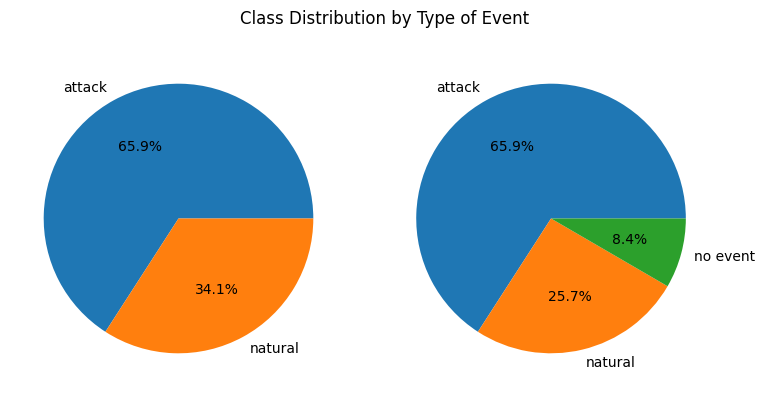

In [11]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
tertiary_class_counts = df['scenario_class'].value_counts()
broad_class_counts = df['scenario_broad_type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
ax2.pie(broad_class_counts, labels=broad_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


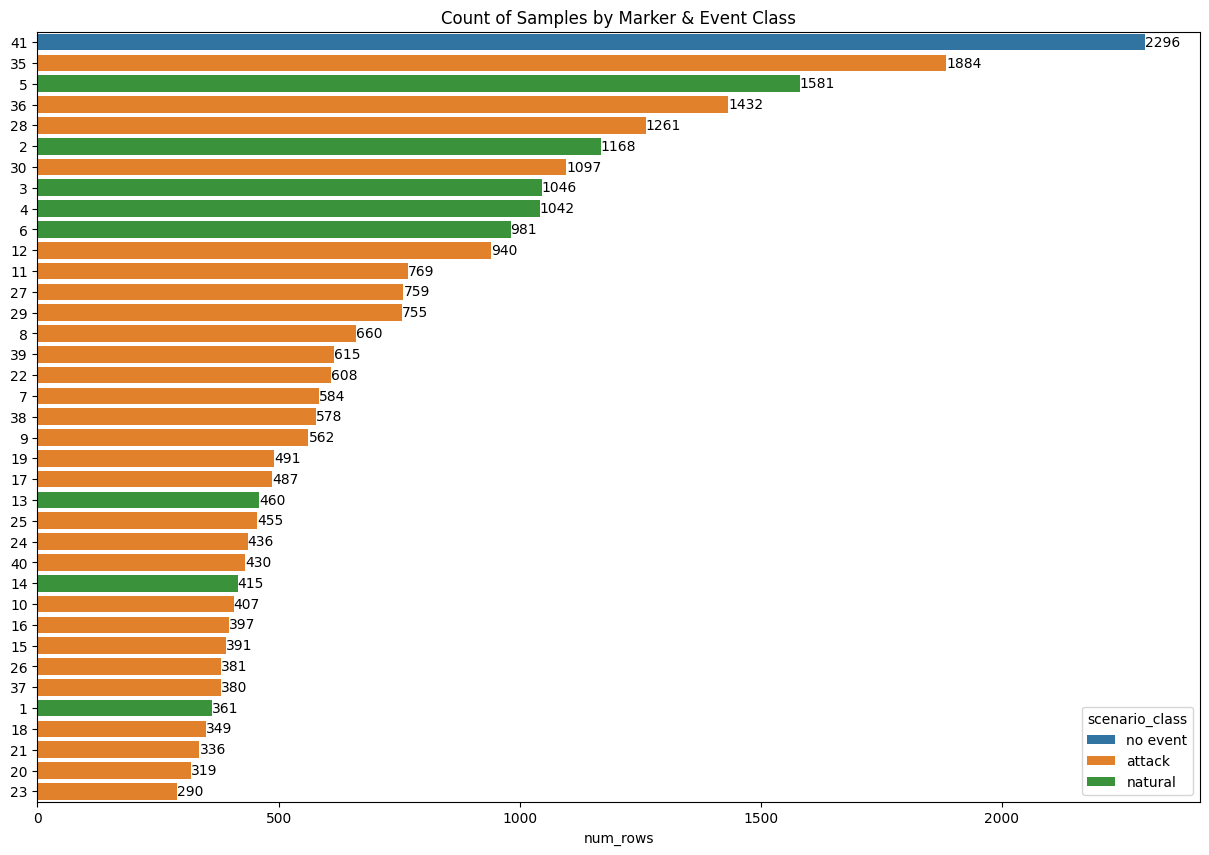

In [12]:
%matplotlib

# get marker class sizes
class_counts = df.loc[:,['scenario_class','marker','snort_log1']].groupby(['scenario_class','marker']).count()
class_counts.columns = ['num_rows']
filt = class_counts['num_rows'] != 0
class_counts = class_counts.loc[filt,:].sort_values(by='num_rows',ascending=False)

# visualize overall class sizes by row count
plt.figure(figsize=(15,10))

g = sns.barplot(x=class_counts['num_rows'], y=[str(i) for i in class_counts.index.get_level_values(1).to_list()], hue=class_counts.index.get_level_values(0))
for i in g.containers:
    g.bar_label(i)

plt.title('Count of Samples by Marker & Event Class')
plt.show()

### Cross Correlation

In [13]:
numeric_df = df.loc[:,df.select_dtypes('number').columns]
corr = numeric_df.corr()
for col in corr.columns:
    print(col,'\n', corr[col].sort_values(ascending=False)[1:10],'\n')

R1_voltage_AC_phase_A_angle 
 R1_pos_neg_zero_voltage_phase_A_angle    0.999105
R4_pos_neg_zero_voltage_phase_A_angle    0.954610
R4_voltage_AC_phase_A_angle              0.954563
R1_pos_neg_zero_current_phase_A_angle    0.896606
R1_current_AC_phase_A_angle              0.886612
R4_pos_neg_zero_current_phase_A_angle    0.880184
R4_current_AC_phase_A_angle              0.871776
R2_voltage_AC_phase_A_angle              0.842513
R3_voltage_AC_phase_A_angle              0.842071
Name: R1_voltage_AC_phase_A_angle, dtype: float64 

R1_voltage_AC_phase_A_magnitude 
 R1_pos_neg_zero_voltage_phase_A_magnitude    0.934577
R1_voltage_AC_phase_C_magnitude              0.781618
R1_voltage_AC_phase_B_magnitude              0.773052
R2_voltage_AC_phase_A_magnitude              0.627154
R3_voltage_AC_phase_A_magnitude              0.591137
R4_voltage_AC_phase_A_magnitude              0.590844
R4_pos_neg_zero_voltage_phase_A_magnitude    0.520989
R2_pos_neg_zero_voltage_phase_A_magnitude    0.456743
R4

# Distplot

In [14]:
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

In [ ]:
mag_df = df.loc[:,[i for i in df.columns if 'magnitude' in i.lower()] + ['is_attack','scenario_class','scenario_broad_type']]
scaled_cols = mag_df.select_dtypes('number')
mag_df[scaled_cols.columns] = scaled_cols.apply(lambda x: np.log(x+1), axis=1)
mag_df.head()


,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_magnitude,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_magnitude,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_magnitude,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_magnitude,is_attack,scenario_class,scenario_broad_type
0,11.757236,11.757040,11.757629,6.408382,6.442199,6.402633,11.757236,0.0,0.0,6.417692,2.652109,2.702459,11.733127,11.731943,11.733795,6.419664,6.451311,6.415329,11.732968,0.0,0.0,6.428592,2.622193,2.626755,11.729559,11.729357,11.729761,6.415297,6.444529,6.409890,11.729559,0.0,0.0,6.423058,2.571486,2.557394,11.757629,11.752709,11.758021,6.405966,6.434292,6.398376,11.756057,0.0,0.0,6.412597,2.585383,2.543100,False,no event,no event
1,11.777454,11.777262,11.778032,6.183310,6.218578,6.178766,11.777647,0.0,0.0,6.193087,2.452760,2.513884,11.761958,11.760780,11.762561,6.195118,6.228027,6.191002,11.761757,0.0,0.0,6.204514,2.467888,2.468857,11.758414,11.758218,11.758610,6.190464,6.220764,6.184821,11.758414,0.0,0.0,6.198684,2.420738,2.404334,11.777839,11.773018,11.778224,6.179525,6.208681,6.171145,11.776299,0.0,0.0,6.186329,2.420738,2.370695,False,no event,no event
2,11.777647,11.777454,11.778224,6.183310,6.218578,6.178006,11.777839,0.0,0.0,6.193087,2.452760,2.513884,11.762009,11.760921,11.762781,6.194172,6.227586,6.191599,11.761897,0.0,0.0,6.204260,2.433346,2.465460,11.758414,11.758218,11.758806,6.191214,6.220764,6.184821,11.758414,0.0,0.0,6.198684,2.420738,2.370695,11.778032,11.773211,11.778224,6.178766,6.209417,6.171910,11.776492,0.0,0.0,6.186705,2.420738,2.404334,False,no event,no event
3,11.779761,11.779569,11.780337,6.181798,6.214924,6.178766,11.779761,0.0,0.0,6.191589,2.370695,2.436877,11.764356,11.763245,11.765041,6.196168,6.225007,6.191072,11.764213,0.0,0.0,6.203913,2.365850,2.373875,11.760765,11.760569,11.760961,6.191964,6.218213,6.185198,11.760765,0.0,0.0,6.198312,2.318015,2.299820,11.780145,11.775142,11.780529,6.178386,6.206098,6.172292,11.778608,0.0,0.0,6.185575,2.335885,2.318015,False,no event,no event
4,11.783594,11.783403,11.784168,6.185198,6.211991,6.185575,11.783785,0.0,0.0,6.194209,2.140949,2.262406,11.768404,11.767378,11.769100,6.199078,6.221581,6.195620,11.768285,0.0,0.0,6.205323,2.140927,2.143614,11.765061,11.764866,11.765061,6.194209,6.214924,6.189714,11.765061,0.0,0.0,6.199428,2.140949,2.096949,11.783977,11.779185,11.784359,6.181798,6.202769,6.178386,11.782446,0.0,0.0,6.187458,2.119191,2.096949,False,no event,no event


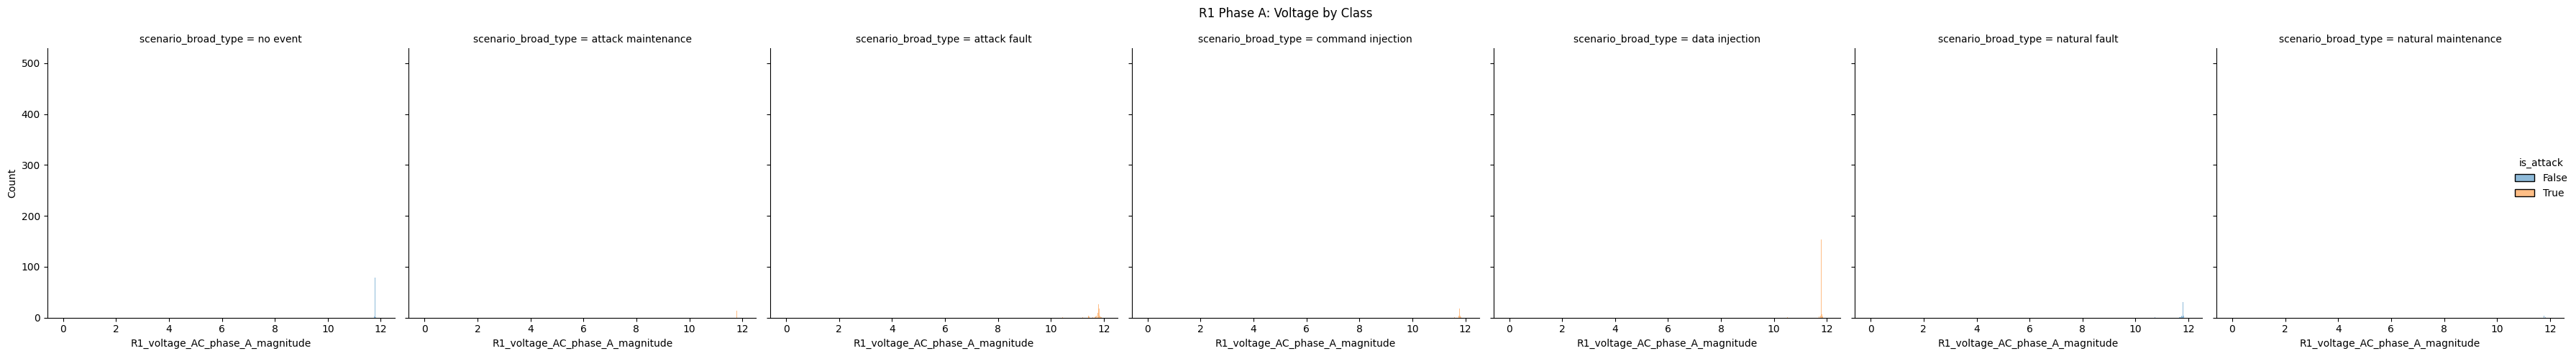

In [19]:
# plot amplitude by class
title = 'R1 Phase A: Voltage by Class'
g = sns.displot(mag_df, x='R1_voltage_AC_phase_A_magnitude', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


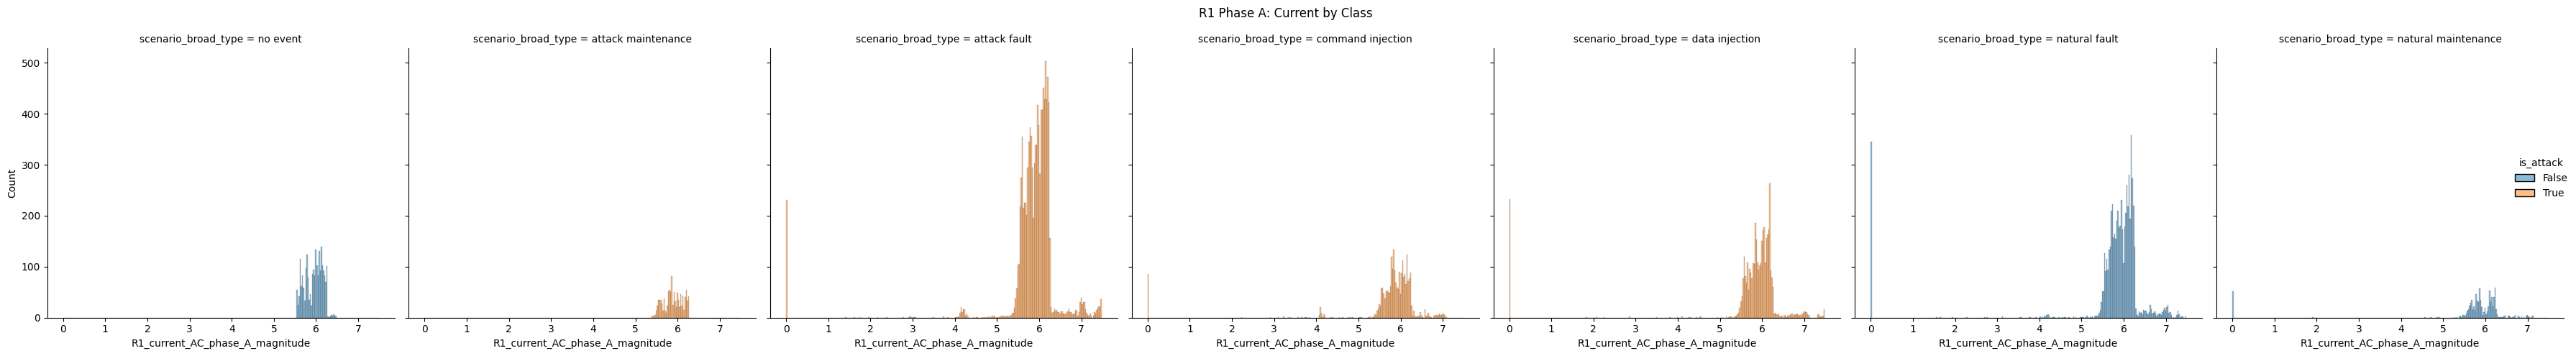

In [17]:
# plot amplitude by class
title = 'R1 Phase A: Current by Class'
g = sns.displot(mag_df, x='R1_current_AC_phase_A_magnitude', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()
